In [2]:
# %pip install numpy matplotlib pandas scipy optuna optuna-dashboard pygasflow
# %optuna-dashboard sqlite:///db.sqlite3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import optuna
import scipy.optimize as opt
from pygasflow import shockwave_solver

c:\Users\Harry\Documents\Code\AER710_Project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Project Description
You are given the task to compare two competitive
systems for thrust delivery in a preliminary design approach. 

One engine under consideration
should be “fictional” (vs. off-the-shelf), whose main attributes are based on your principal design 
requirements from the mission definition (additional “nuts and bolts” stuff to complete the engine 
can be added later, or alluded to more briefly). The second engine should be an off-the-shelf one 
and two engines should be compared in a trade-off study. That is, the differences in performance 
characteristics should be explained based on design inputs of the fictional, i.e., design, engine. 

As an aircraft-based project, you may wish to review (and use) your AER 615 Aircraft Performance
notes to assist in mission definition. Bear in mind, however, that the main emphasis of this project
is on the design and analysis of your propulsion systems, not the whole vehicle.

The design process is broken down into two phases. 
First, you will need to design and optimize a
supersonic inlet for your “fictional” engine using the Oswatisch principle (as explained below), and
after that, you will complete a comprehensive parametric cycle analysis study for performance
parameters. Finally, you will use your findings in your preliminary design. A detailed comparison
of both engines is required.

---

## 1.1. Part I: Supersonic Inlet Design
Your first task is to preliminary design the inlet of your “fictional” engine for high supersonic flight.
In a supersonic intake, the freestream is decelerated to subsonic speed through a suitable shock
system. The number of oblique shocks is a matter of designer choice. Higher flight Mach numbers
require a greater number of oblique shocks.

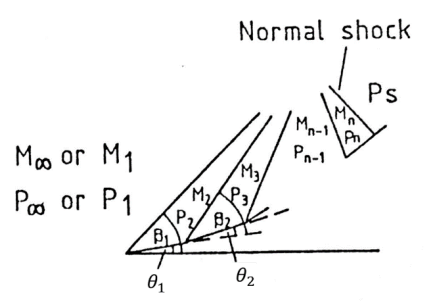

Figure 1. Multi shock compression for Oswatisch optimization (Goldsmith, 1993).


Your primary concern is to optimize the inlet for the pressure recovery ratio ($\pi_𝐝$) across the entire
inlet. According to Oswatitsch’s principle (Oswatitsch, 1947), the pressure recovery in a system of
($n − 1$) oblique shocks followed by the nth normal shock (see Fig. 1) is maximum when the shocks
are of equal strength, i.e., that is upstream Mach numbers normal to the oblique shocks are equal:

$$M_1 sin(\beta_1) = M_2 sin(\beta_2) = ... = M_{n-1} sin(\beta_{n-1})$$

Above equation combined with the oblique shock relations, that are

$M_{downstream} = f(M_{upstream},\gamma,\beta)$
and
$\theta = f(M,\gamma,\beta)$

the resultant system of equations can be numerically solved to calculate for

- $M_1$ to $M_{n-1}$
- $\beta_1$ to $\beta_{n-1}$
- $\theta_1$ to $\theta_{n-1}$
- $\pi_1$ to $\pi_{n-1}$

### 1.1.1. Part I: Project Deliverables 

Your task is to design a **supersonic ramp inlet** that maximizes $\pi_d$. You need to design an optimal
shock system consisting of 3 oblique shocks followed by a normal shock.

**Inputs:**
|||
|---|---|
|Number of shocks | 4 (3 oblique shocks + normal shock) |
|Flight Mach number | $M_1 = 3.2$ |
|The normal shock up-stream Mach number | $(M_n) = 1.3$ |
|Gamma | $\gamma = 1.4$ |


**Outputs:**

Your results should include

|||
|---|---|
|The Mach numbers | ($M_2$ to $M_{n-1}$) | 
|Oblique shockwave angles | ($\beta_1$ to $\beta_{n-1}$) |
|Flow deflection angles | ($\theta_1$ to $\theta_{n-1}$) |
|Stagnation pressure ratios across the individual <br/> oblique shock and the normal shock | ($\pi_1$ to $\pi_n$)|
|The intake pressure recovery ratio | ($\pi_d$)|

You must also include a rendition of the resultant inlet geometry.

### Hints
1) There are multiple solutions to the systems of equations. For example, depending on the initial
guess you can get negative values for Mach numbers. You need to limit your domain to physically
realistic values.
2) You will need to solve several equations simultaneously. However, you do not need to write
code to do this, e.g., see the Matlab fsolve or vpasolve function.

### Notes

- The problem of determining the optimum shock pattern for an
external compression inlet with a given number of shocks,
oblique shocks followed by one terminal normal shock
was solved by Oswatitsch in a 1944 German report (translated
into English in 1947 as a NACA report).
- The result is astonishingly simple. It states that in an optimum
multishock inlet, all shocks need to be of equal strength.
- This that the normal component of Mach number must be the
same for all the oblique shocks.

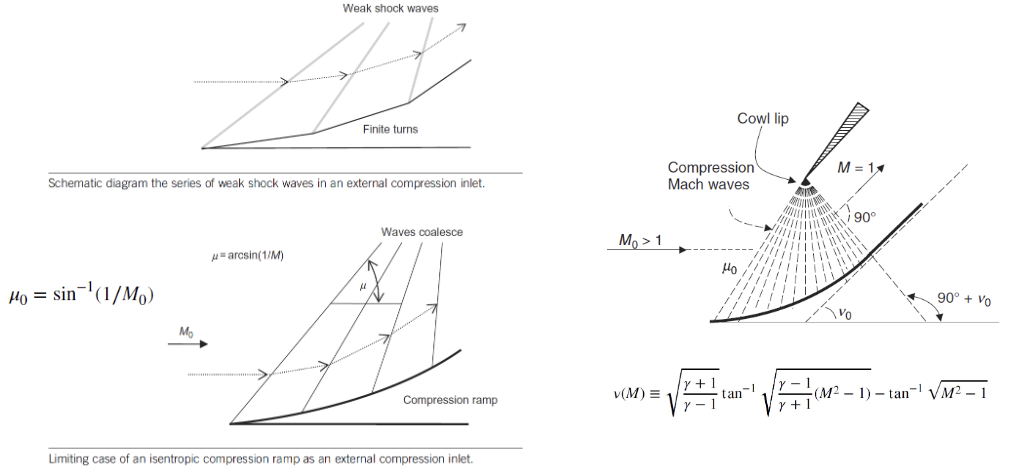

In [4]:
def print_oblique_shockwave(M1, MN1, M2, MN2, beta, theta, pr, dr, tr, tpr):
    print("M1 \t\t {}".format(M1))
    print("Mn1 \t\t {}".format(MN1))
    print("M2 \t\t {}".format(M2))
    print("Mn2 \t\t {}".format(MN2))
    print("beta \t\t {}".format(beta))
    print("theta \t\t {}".format(theta))
    print("p2/p1 \t\t {}".format(pr))
    print("rho2/rho1 \t {}".format(dr))
    print("t2/t1 \t\t {}".format(tr))
    print("p02/p01 \t {}".format(tpr))
    print()

def compute_flow(m1, mn, n_oblique):
    # Oblique shock 1

    b1 = 45
    b2 = 60
    b3 = 75

    s1 = shockwave_solver("m1", 4, "beta", b1)
    print_oblique_shockwave(*s1)

    # Oblique shock 2
    s2 = shockwave_solver("m1", 4, "beta", b2)
    print_oblique_shockwave(*s2)

    # Oblique shock 3
    s3 = shockwave_solver("m1", 4, "beta", b3)
    print_oblique_shockwave(*s3)



compute_flow(m1=3.2, mn=1.3, n_oblique=3)

M1 		 4.0
Mn1 		 2.8284271247461903
M2 		 1.8597691412487911
Mn2 		 0.4861724348043977
beta 		 45.0
theta 		 29.84593194968742
p2/p1 		 9.166666666666668
rho2/rho1 	 3.6923076923076925
t2/t1 		 2.482638888888889
p02/p01 	 0.3802016523448092

M1 		 4.0
Mn1 		 3.4641016151377544
M2 		 1.1956097341641483
Mn2 		 0.4525696378552517
beta 		 60.0
theta 		 37.75757659142036
p2/p1 		 13.833333333333332
rho2/rho1 	 4.235294117647059
t2/t1 		 3.266203703703703
p02/p01 	 0.21967235590619108

M1 		 4.0
Mn1 		 3.8637033051562732
M2 		 0.686890206460498
Mn2 		 0.438802713372562
beta 		 75.0
theta 		 35.29573322010947
p2/p1 		 17.249570435321427
rho2/rho1 	 4.49459584221707
t2/t1 		 3.8378468367052676
p02/p01 	 0.15576559885202962



---

## 1.2. Part II: Parametric Cycle Analysis
Apply one-dimensional parametric cycle analysis to calculate the performance parameters of your
“fictional” engine(s). Analyze both engines as part of the supersonic mission requirements and
draw conclusions based on a trade-off study.
### 2. Design Instructions
For the final report, you are encouraged to apply your computer programming and/or spreadsheet
skills in undertaking any parametric study, as evidence of your engineering design selection
process towards the chosen system (where possible, avoid decisions via rough guesses, trial-anderror, intuition, and aesthetics; however, rules of thumb are acceptable as starting points in
design).

Use and apply as many equations as possible from various sources, including your course textbook,
notes, and other literature, as additional evidence of engineering techniques being applied in
system selection. The knowledge you gain from this course should tell you if the numbers these
equations give you are reasonable, or not. Where the respective propulsion system’s performance
seems good, or bad, or unrealistic, objectively discuss the design issues(e.g., as you learned in AER
404 Intro to Aerospace Engineering Design).

The efficiency of components should be chosen based on historical values and from a literature
survey. This part of the analysis is as much a research project as a design project.